In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import datetime


# Read Data

In [41]:
df = pd.read_csv('/Users/jamilahalharbi/Desktop/jeje/UsedCarsSA_Unclean_EN.csv') 

In [42]:
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


In [44]:
df.shape

(8248, 15)

# Data Cleaning

In [45]:
#define values
values = ["Negotiable"]
#drop rows that contain any value in the list
df = df[df.Price.isin(values) == False] 

In [46]:
df.columns = df.columns.str.replace(' ', '')

In [47]:
df["Price"] = df.Price.astype(float)

In [48]:
df.isnull().sum()

Link              0
Make              0
Type              0
Year              0
Origin           27
Color             0
Options          41
Engine_Size    1227
Fuel_Type         0
Gear_Type        19
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

In [49]:
df['Engine_Size'].fillna((df['Engine_Size'].mean()), inplace=True)
df['Options']=df['Options'].fillna("Semi Full")
df['Gear_Type']=df['Gear_Type'].fillna("Automatic")

In [50]:
df.drop(['Region','Origin','Link','Negotiable','Condition','Make','Type'], axis='columns', inplace=True)

# EDA

In [51]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Options.value_counts())
print(df.Gear_Type.value_counts())
print(df.Engine_Size.value_counts())

Gas       5537
Diesel     102
Hybrid      13
Name: Fuel_Type, dtype: int64
Full         2141
Standard     1968
Semi Full    1543
Name: Options, dtype: int64
Automatic    5047
Manual        605
Name: Gear_Type, dtype: int64
3.089695    1227
1.600000     421
2.000000     418
3.500000     403
2.500000     333
            ... 
8.800000       1
8.900000       1
8.700000       1
7.200000       1
8.500000       1
Name: Engine_Size, Length: 70, dtype: int64


In [52]:
print(df.Engine_Size.value_counts())

3.089695    1227
1.600000     421
2.000000     418
3.500000     403
2.500000     333
            ... 
8.800000       1
8.900000       1
8.700000       1
7.200000       1
8.500000       1
Name: Engine_Size, Length: 70, dtype: int64


In [53]:
curr_time = datetime.datetime.now()
df['Year'] =df['Year'].apply(lambda x : curr_time.year - x)

# Feature Visulization 

Text(0, 0.5, 'Count of cars')

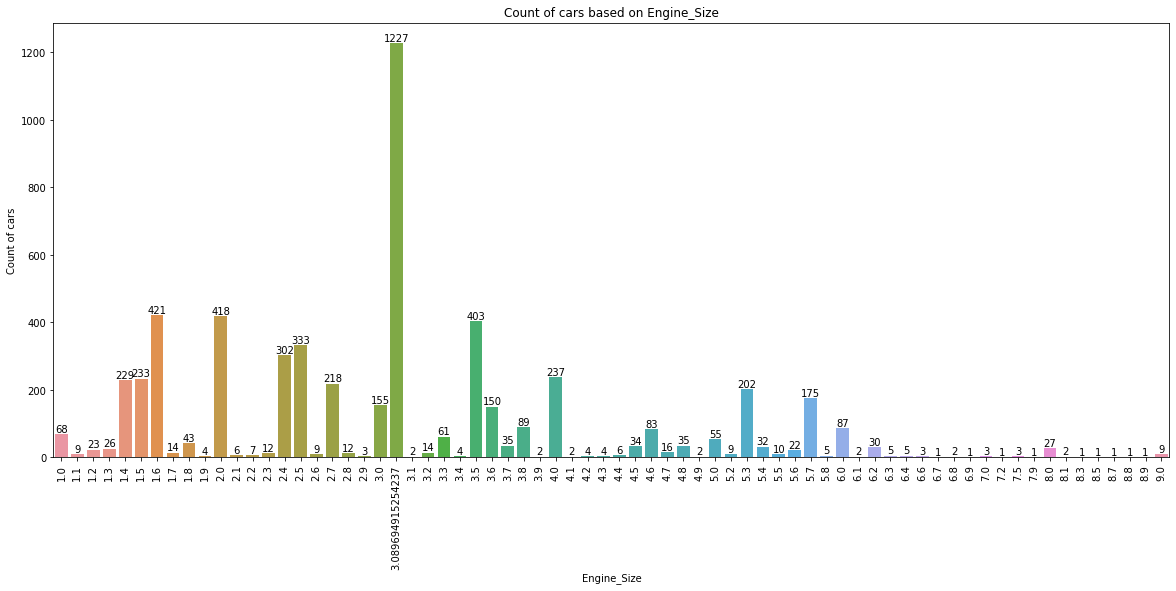

In [54]:
plt.figure(figsize = (20, 8))
plot = sns.countplot(x = 'Engine_Size', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Engine_Size")
plt.xlabel("Engine_Size")
plt.ylabel("Count of cars")

/opt/anaconda3/envs/J-Rabeh/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


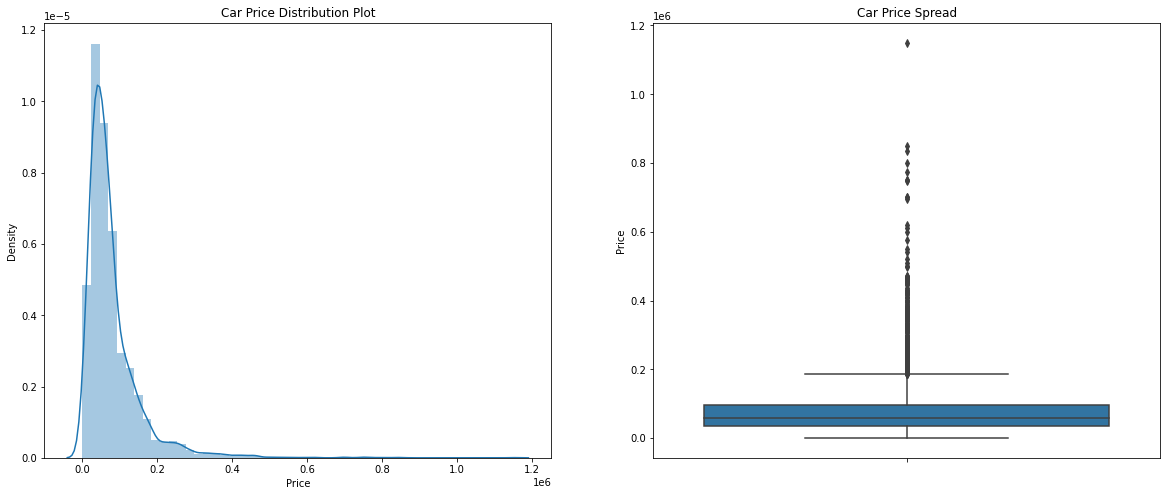

In [55]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.Price)

plt.show()

In [56]:
print(df.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.652000e+03
mean     7.853659e+04
std      7.607374e+04
min      0.000000e+00
25%      3.500000e+04
50%      5.800000e+04
75%      9.500000e+04
85%      1.290000e+05
90%      1.550000e+05
100%     1.150000e+06
max      1.150000e+06
Name: Price, dtype: float64


The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

Text(0, 0.5, 'Count of cars')

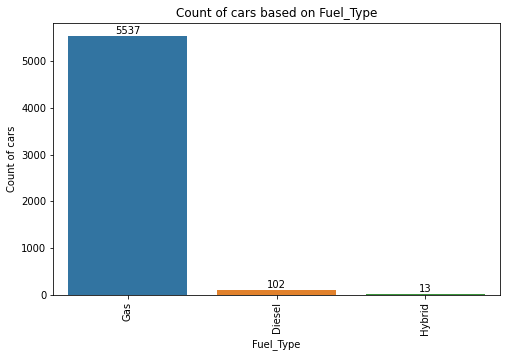

In [57]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Fuel_Type', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Fuel_Type")
plt.xlabel("Fuel_Type")
plt.ylabel("Count of cars")


Text(0, 0.5, 'Count of Options')

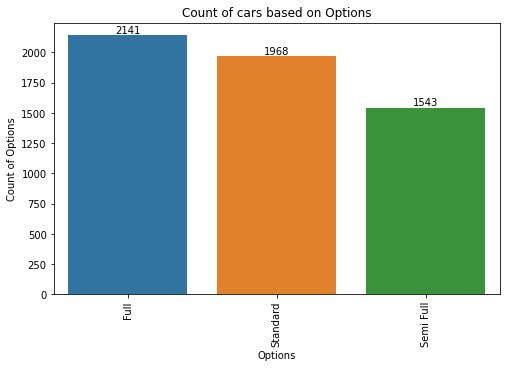

In [58]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Options', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Options")
plt.xlabel("Options")
plt.ylabel("Count of Options")

/opt/anaconda3/envs/J-Rabeh/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


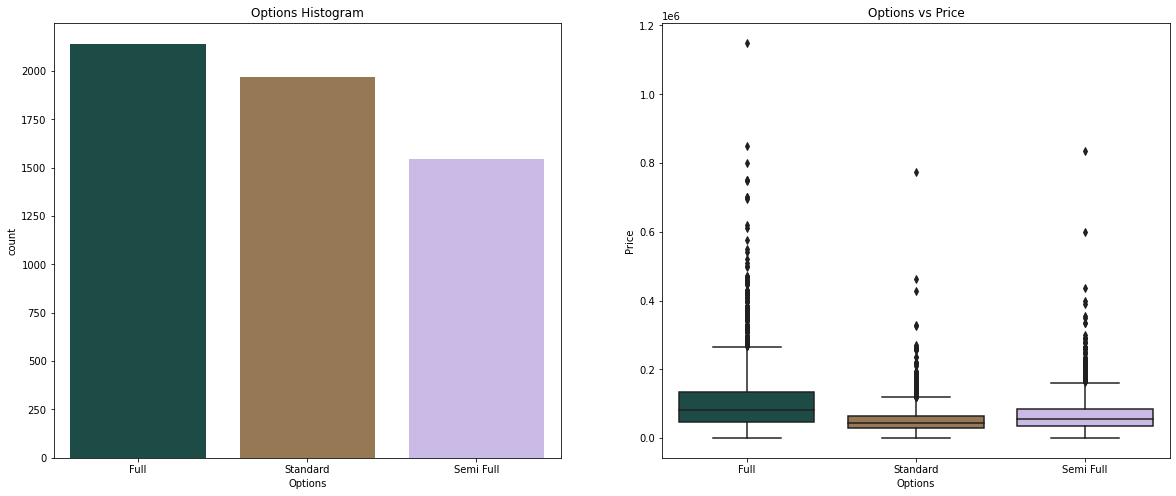

In [59]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Options Histogram')
sns.countplot(df.Options, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Options vs Price')
sns.boxplot(x=df.Options, y=df.Price, palette=("cubehelix"))

plt.show()

/opt/anaconda3/envs/J-Rabeh/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


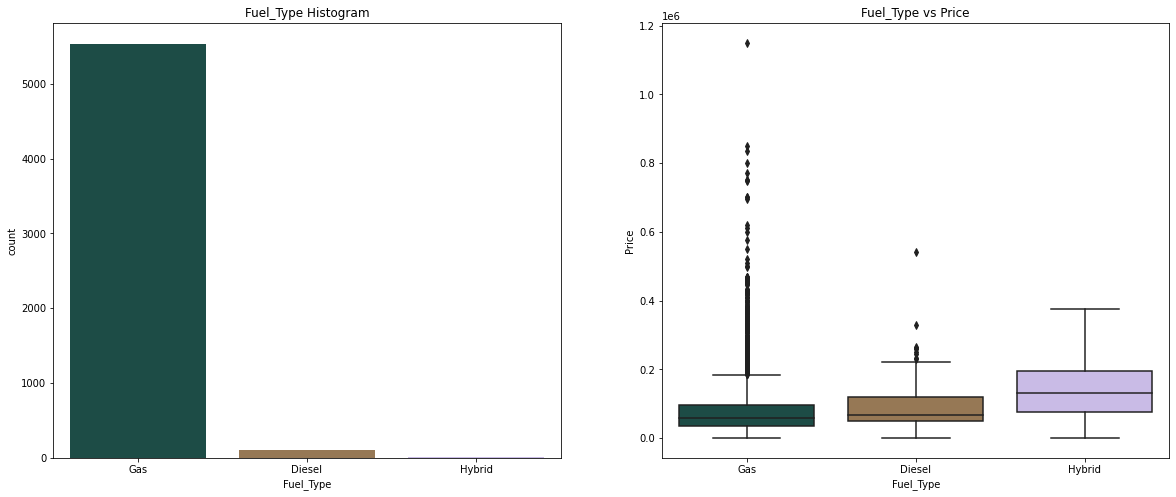

In [60]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel_Type Histogram')
sns.countplot(df.Fuel_Type, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Fuel_Type vs Price')
sns.boxplot(x=df.Fuel_Type, y=df.Price, palette=("cubehelix"))

plt.show()

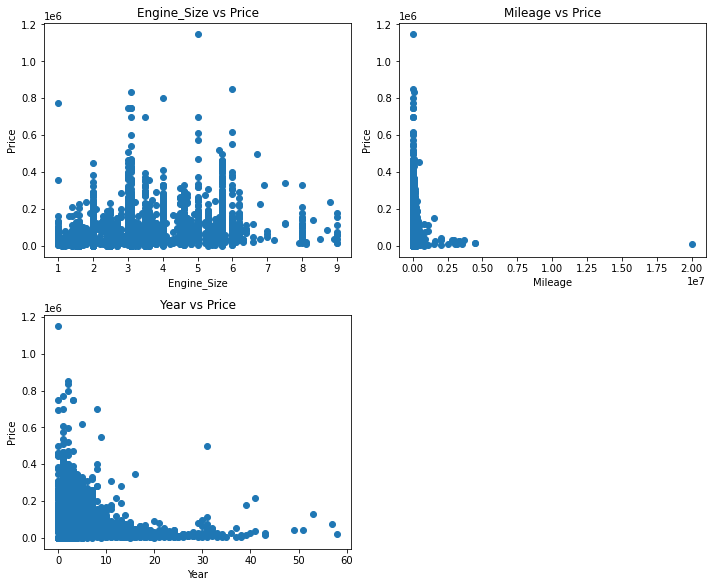

In [61]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Engine_Size', 1)
scatter('Mileage', 2)
scatter('Year', 3)


plt.tight_layout()

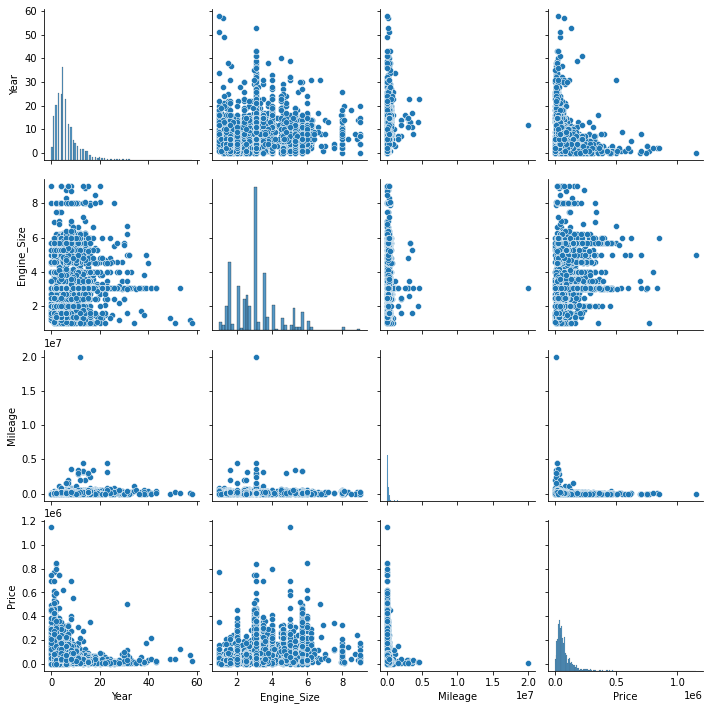

In [62]:
sns.pairplot(df)
plt.show()

# Handling outliers

In [63]:
print('skewness value of Price: ',df['Price'].skew())

print('skewness value of Mileage: ',df['Mileage'].skew())
print('skewness value of Engine_Size: ',df['Engine_Size'].skew())

skewness value of Price:  3.69172936104097
skewness value of Mileage:  39.75534771358313
skewness value of Engine_Size:  1.0074233207077927


In [64]:
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Mileage']=np.where(df['Mileage']>upper_whisker,upper_whisker,np.where(df['Mileage']<lower_whisker,lower_whisker,df['Mileage']))

In [65]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Price']=np.where(df['Price']>upper_whisker,upper_whisker,np.where(df['Price']<lower_whisker,lower_whisker,df['Price']))

In [66]:
print('skewness value of Mileage: ',df['Mileage'].skew())
print('skewness value of Price: ',df['Price'].skew())

skewness value of Mileage:  0.8908360853408381
skewness value of Price:  0.9788669812792231


# Detect Muticolleanity

In [67]:
X = df[['Year','Mileage','Engine_Size']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature       VIF
0         Year  2.841255
1      Mileage  2.815823
2  Engine_Size  2.741316


# Dummies 

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
df = dummies('Options',df)
df = dummies('Color',df)
df = dummies('Fuel_Type',df)
df = dummies('Gear_Type',df)

df.head()

# Normlization

y=pd.DataFrame(df.iloc[:,3], columns=['Price'])
X=df

X.drop(['Price'], axis=1)

scaler = MinMaxScaler()
num_vars = ['Year','Engine_Size','Mileage','Price']
X[num_vars] = scaler.fit_transform(df[num_vars])

# Pickel Data 

In [68]:
import pickle

with open("df.pkl", 'wb') as picklefile: 
     pickle.dump(df, picklefile)

# MODEL IMPLEMENTATION

In [69]:
df_model = df.copy(deep=True)

In [70]:
df_model.shape[0] - df_model.dropna().shape[0]

0

In [71]:
df_model.head()

,Year,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Price
0,3,Black,Full,5.7,Gas,Automatic,103000.0,114000.0
2,2,Silver,Standard,1.5,Gas,Automatic,72418.0,27500.0
3,2,Grey,Standard,1.6,Gas,Automatic,114154.0,43000.0
4,2,Silver,Semi Full,2.0,Gas,Automatic,41912.0,59500.0
5,3,Navy,Full,1.5,Gas,Automatic,39000.0,72000.0


In [72]:
df_model_features = df_model[['Year', 'Color', 'Options', 'Engine_Size', 'Fuel_Type'
                              , 'Gear_Type', 'Mileage']]
df_model_target = df_model['Price']

In [73]:
df_model.shape

(5652, 8)

We have to encode the categorical features before we can fit a model. There are multiple ways we can do this. We will use the "one-hot encoding" method and simply dummify such features (this creates a new column for each category of each categorical column). Each of these 'dummy' columns will hold a value of 0 or 1.

In [74]:
df_model_features = pd.DataFrame(pd.get_dummies(df_model_features))

In [75]:
df_model_features.shape

(5652, 26)

In [76]:
p = PolynomialFeatures(degree=4)
df_model_features_d2 = p.fit_transform(df_model_features)
df_model_features_d2.shape

(5652, 27405)

In [77]:
new_columns = p.get_feature_names(df_model_features.columns)
len(new_columns)

/opt/anaconda3/envs/J-Rabeh/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


27405

In [78]:
type(df_model_features_d2)

numpy.ndarray

We will now add the new feature names and convert it back to a data frame.

In [79]:
df_model_features_d2 = pd.DataFrame(df_model_features_d2, columns = new_columns)
df_model_features_d2.shape

(5652, 27405)

In [80]:
df_model_features_d2.head()

,1,Year,Engine_Size,Mileage,Color_Another Color,Color_Black,Color_Blue,Color_Bronze,Color_Brown,Color_Golden,...,Fuel_Type_Hybrid^2 Gear_Type_Manual^2,Fuel_Type_Hybrid Gear_Type_Automatic^3,Fuel_Type_Hybrid Gear_Type_Automatic^2 Gear_Type_Manual,Fuel_Type_Hybrid Gear_Type_Automatic Gear_Type_Manual^2,Fuel_Type_Hybrid Gear_Type_Manual^3,Gear_Type_Automatic^4,Gear_Type_Automatic^3 Gear_Type_Manual,Gear_Type_Automatic^2 Gear_Type_Manual^2,Gear_Type_Automatic Gear_Type_Manual^3,Gear_Type_Manual^4
0,1.0,3.0,5.7,103000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2.0,1.5,72418.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,2.0,1.6,114154.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,2.0,2.0,41912.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,3.0,1.5,39000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_model_features_d2 = pd.DataFrame(std.fit_transform(df_model_features_d2), columns=new_columns)

In [ ]:
m = LinearRegression()
m.fit(df_model_features_d2, df_model_target)
m.score(df_model_features_d2, df_model_target)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(df_model_features_d2, df_model_target)
lasso_model.score(df_model_features_d2, df_model_target)

In [ ]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(df_model_features_d2, df_model_target)
ridge_model.score(df_model_features_d2, df_model_target)

In [ ]:
i = 0
required_columns = []
for index, val in enumerate(lasso_model.coef_):
    if val!=0.0:
        #print('Index:%s, Value:%s'%(index, val))
        required_columns.append(index)
        i+=1
print('There are',i,'required columns.')

# Now that we have the features we need, let's get rid of the rest:

In [ ]:
df_model_features_d2_final = df_model_features_d2[df_model_features_d2.columns[required_columns]]

In [ ]:
df_model_features_d2_final.head()

In [ ]:
df_model_features_d2_final.shape

In [ ]:
lasso_temp = LassoCV()
lasso_temp.fit(df_model_features_d2_final, df_model_target)
lasso_temp.score(df_model_features_d2_final, df_model_target)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_model_features_d2_final, df_model_target
                                                    , test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
m_2 = LinearRegression()
m_2.fit(X_train, Y_train)
m_2.score(X_train, Y_train)

In [ ]:
lasso_model_2 = LassoCV()
lasso_model_2.fit(X_train, Y_train)
lasso_model_2.score(X_test, Y_test)

In [ ]:
lasso_model_2.score(X_train, Y_train)

In [ ]:
ridge_model_2 = RidgeCV()
ridge_model_2.fit(X_train, Y_train)
ridge_model_2.score(X_test, Y_test)

In [ ]:
ridge_model_2.score(X_train, Y_train)

In [ ]:
from yellowbrick.regressor import ResidualsPlot
ridge_model_viz = RidgeCV()
visualizer = ResidualsPlot(ridge_model_viz, hist=True)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()
